## Оглавление:

* [1. Обзор данных](#обзор_данных)
* [2. Предобработка данных](#предобработка_данных)
    * [2.1. Обработка пропущенных значений](#обработка_пропусков)
    * [2.2. Обработка дублирующих наименований](#обработка_дубликатов)
* [3. Дополнение данных](#дополнение_данных)
* [4. Исследовательский анализ](#исследовательский_анализ)
    * [4.1. Оценка распределения значений](#оценка_распределения)
    * [4.2. Зависимость цены от различных параметров](#зависимость_цены)
    * [4.3. Изучение скорости продажи недвижимости](#изучение_скорости)
    * [4.4. Средняя стоимость за м2](#стоимость_за_м2)
    * [4.5. Отличие стоимости за м2 в центре и на окраине Санкт-Перербурга](#удаленность_от_центра_спб)
* [5. Выводы](#выводы)

# Оценка рынка недвижимости Санкт-Петербурга и Ленинградской области

**Цель исследования** - Нахождение зависимостей между различными параметрами жилья, такими как площадь квартиры, удленность от центра города, наличие балкона и другие.
  
**Ход исследования** - Данные о поведении пользователей получены из файла с расширением .csv. 
К данным приложена документация, однако могут встречаться пропуски или значения, искажающие данные.
Поэтому перед проверкой гипотез требуется провести обзор данных и их обработку.

## 1. Обзор данных <a class="anchor" id="обзор_данных"></a>

В исследовании используются средства библиотеки `pandas`.
Данные получены в виде файла с расширением .csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

Для общего представления о полученных данных осуществляется вывод первых 5-ти строк таблицы,
а также используется метод `info`.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Наименования столбцов**
  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Наблюдается значительное количество пропусков.  
Для некоторых столбцов доля отсутствующих значений составляет более 50%.  
Необходимо оценить распределение данных и по возможности заполнить пропуски.

## 2. Предобработка данных <a class="anchor" id="предобработка_данных"></a>

### 2.1 Обработка пропущенных значений <a class="anchor" id="обработка_пропусков"></a>

В данных наблюдаются множественные пропуски, потребуется их изучение и заполнение релевантными значениями

**Высота потолков**

In [5]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Наблюдаются аномально высокие значения, такие как 27.0, 32.0. Вероятнее всего, реальные значения - 2.7, 3.2 соответственно.  
Все значения больше 20м заменяются на порядок меньшими.

In [6]:
for index in range(len(df['ceiling_height'])):
    if df.loc[index, 'ceiling_height'] > 20:
        df.loc[index, 'ceiling_height'] = df.loc[index, 'ceiling_height']/10

In [7]:
df['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

Теперь возможно заменить отсутствующие данные медианным значением.

In [8]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace = True)

df['ceiling_height'].median()

2.65

**Этажность здания**

In [9]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Выбросов не обнаружено, пропуски можно заполнить медианным значением и привести к целочисленным значениям.

In [10]:
df['floors_total'].fillna(df['floors_total'].median(), inplace = True)
df['floors_total'] = df['floors_total'].astype(int)

**Жилая площадь и площадь кухни**
  
Для заполнения пропусков в этих столбцах целесообразно оценить, какую долю от общей площади занимает жилая площадь и кухня соответственно.
  
Таким образом, можно предсказать эти значения там, где они пропущены.

In [11]:
living_area_part = (df['living_area']/df['total_area']).mean()
kitchen_area_part = (df['kitchen_area']/df['total_area']).mean()

df['living_area'].fillna(df['total_area']*living_area_part, inplace = True)
df['kitchen_area'].fillna(df['total_area']*kitchen_area_part, inplace = True)

print(f'Жилая площадь занимает в среднем {living_area_part :.1%} от общей площади')
print(f'Площадь кухни занимает в среднем {kitchen_area_part :.1%} от общей площади')

Жилая площадь занимает в среднем 56.5% от общей площади
Площадь кухни занимает в среднем 18.7% от общей площади


**Количество балконов**  
**Наличие парков и прудов поблизости**
  
В случае, если количество балконов, а также количество прудов и парков в радиусе 3х километров не указано, предположим, что их нет.
Отсутствующие значения заменяются на `0`

In [12]:
df['balcony'].fillna(0, inplace = True)
df['parks_around3000'].fillna(0, inplace = True)
df['ponds_around3000'].fillna(0, inplace = True)

df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

**Длительность размещения объявления**
  
Срок размещения объявления предсказать невозможно. Пропущенные значения заменяются на `0` т.к. точное значение предположить невозможно. В дальнейшем эти значения не будут использованы в исследовании.

In [13]:
df['days_exposition'].fillna(0, inplace = True)
df['days_exposition'] = df['days_exposition'].astype(int)

**Населенный пункт**
  
Отсутствующие значения в столбце `Населенный пункт` заменяются самым распространенным значением `Санкт-Петербург`

In [14]:
df.groupby('locality_name')['last_price'].count().sort_values(ascending=False)

locality_name
Санкт-Петербург       15721
посёлок Мурино          522
посёлок Шушары          440
Всеволожск              398
Пушкин                  369
                      ...  
поселок Каложицы          1
поселок Кирпичное         1
поселок Коммунары         1
поселок Коробицыно        1
село Шум                  1
Name: last_price, Length: 364, dtype: int64

In [15]:
df['locality_name'].fillna('Санкт-Петербург', inplace = True)

**Апартаменты**
  
Если не указано, используется ли недвижимость как апартаменты, предполагается, что нет. Пропущенные значения заменяются на `False`

In [16]:
df['is_apartment'].fillna(False, inplace = True)
df['is_apartment'] = df['is_apartment'].astype(bool)

**Инфраструктура**
  
Если не указано, на каком расстоянии находится аэропорт, а также парки и пруды, предполагается что аэропорта поблизости нет. Пропущенные значения заменяются на `0` т.к. точное значение предположить невозможно. В дальнейшем эти значения не будут использованы в исследовании.

In [17]:
infrastructure_list = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

for infrastructure in infrastructure_list:
    df[infrastructure].fillna(0, inplace = True)
    df[infrastructure] = df[infrastructure].astype(int)

**Проверка заполнения пропусков**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int32  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Все пропущенные значения заполнены.

### 2.2 Обработка дублирующих наименований <a class="anchor" id="обработка_дубликатов"></a>

Наименования населенных пунктов могут быть записаны по-разному, поэтому необходимо привести их к единому виду.

In [19]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Необходимо убрать слова, обозначающие тип населенного пункта.

In [20]:
for town in ['поселок ', 'посёлок ', 'деревня ', 'село ', 
             'садовое ', 'садоводческое ', 'некоммерческое ', 'товарищество ', 
             'городской ', 'городского типа ', 'коттеджный ', 
             'при железнодорожной ', 'станции ', 
             'Пансионат ', 'Платформа ']:
     df['locality_name'] = df['locality_name'].str.replace(town, '')

In [21]:
df['locality_name'].sort_values().unique()

array(['69-й километр', 'Агалатово', 'Александровская', 'Алексеевка',
       'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка',
       'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зелёный Бор', '

Все дублирующие названия приведены к единому виду.

## 3. Дополнение данных <a class="anchor" id="дополнение_данных"></a>

**Цена за м2**
  
Необходимо добавить столбец со стоимостью м2 объектов недвижимости

In [22]:
df['sqare_meter_price'] = df['last_price'] / df['total_area']

**Время размещения объявления**
  
Для дальнейшего исследования добавляются столбцы с днем недели, месяцем и годом размещения объявления о продаже.

In [23]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
df['exposition_weekday'] = df['first_day_exposition'].dt.dayofweek
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

**Тип этажа**
  
Добавляется столбец с типом этажа, на котором располагается квартира:  
`Первый`, `Последний` или `Другой`

In [25]:
df.loc[:,'floor_type'] = 'другой'
df.loc[:,'floor_type'][df.loc[:,'floor'] == df.loc[:,'floors_total']] = 'последний'
df.loc[:,'floor_type'][df.loc[:,'floor'] == 1] = 'первый'

C:\Users\Александр\AppData\Local\Temp\ipykernel_20732\1559493703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'floor_type'][df.loc[:,'floor'] == df.loc[:,'floors_total']] = 'последний'
C:\Users\Александр\AppData\Local\Temp\ipykernel_20732\1559493703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'floor_type'][df.loc[:,'floor'] == 1] = 'первый'


In [26]:
df['floor_type_id'] = 2
df['floor_type_id'][df['floor_type'] == 'первый'] = 1
df['floor_type_id'][df['floor_type'] == 'последний'] = 3

C:\Users\Александр\AppData\Local\Temp\ipykernel_20732\286785273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_type_id'][df['floor_type'] == 'первый'] = 1
C:\Users\Александр\AppData\Local\Temp\ipykernel_20732\286785273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor_type_id'][df['floor_type'] == 'последний'] = 3


<div class="alert alert-info"> 
    
Подскажите пожалуйста, как убрать warning при индексации

</div>

Также добавляется столбец с id типа этажа, где:

In [27]:
df.pivot_table(index='floor_type', values='floor_type_id').sort_values(by='floor_type_id', ascending=True)

,floor_type_id
floor_type,
первый,1
другой,2
последний,3


**Удаленность от центра в км**

Значения удаленности от центра переводятся в километры и округляются.

In [28]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round(0).astype(int)

**Проверка дополненности датафрейма**

In [29]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqare_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,floor_type_id,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755,0,120370.370370,3,3,2019,другой,2,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0,81,82920.792079,1,12,2018,первый,1,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574,558,92785.714286,3,8,2015,другой,2,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.797718,9,False,...,3,234,424,408176.100629,4,7,2015,другой,2,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48,121,100000.000000,1,6,2018,другой,2,8


Все необходимые для исследования данные добавлены.

## 4. Исследовательский анализ <a class="anchor" id="исследовательский_анализ"></a>

### 4.1. Оценка распределения значений <a class="anchor" id="оценка_распределения"></a>

Для оценки корректности имеющихся данных следует изучить распределение значений для следующих параметров:
    
* Цена 
* Площадь
* Количество комнат
* Высота потолков
* Этажность
* Инфраструктура
* Размещение объявления

**Цена** <a class="anchor" id="цена"></a>

In [30]:
def top_range (col): #функции для отсечения выбросов на основании межквартильного размаха
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    top_range = Q3+IQR*1.5 
    return top_range

def bottom_range (col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    bottom_range = Q1-IQR*1.5 
    return bottom_range

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

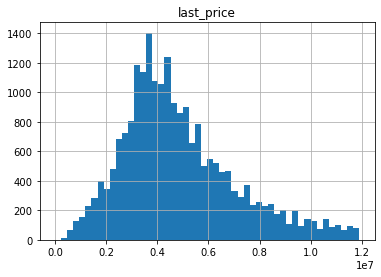

In [31]:
df.hist(column='last_price', 
        bins=50, 
        range=(0,top_range('last_price'))
        )

Гистограмма цен близка к нормальному распределению, что говорит о доствоерности имеющихся данных.
Наибольшее количество объявлений размещено для объектов стоимостью от 3 до 5 млн.руб.

**Площадь** <a class="anchor" id="площадь"></a>

In [32]:
square_to_analyse = ['total_area', 'living_area', 'kitchen_area']

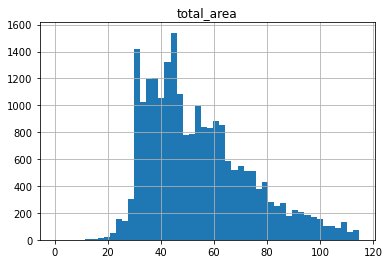

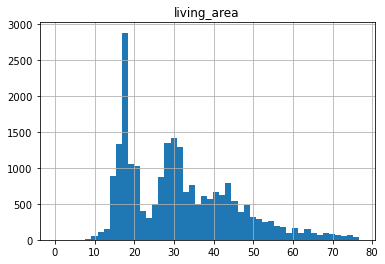

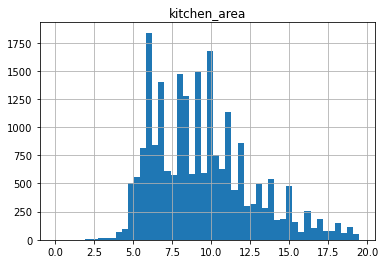

In [33]:
for col in square_to_analyse:
    df.hist(column=col, bins=50, range=(0,top_range(col)))

Гистограммы общей площади и площади кухни также соответствуют нормальному распределению и свидетельствуют о корректности данных.

Однако, распределение значений жилой площади квартир имеет 2 явных пика, около 18м2 и 30м2. Необходимо изучить причину данной аномалии.

<div class="alert alert-info"> 
    
Подскажите пожалуйста, как можно проверить причину такого распределения жилой площади, не вижу связи с общей площадью и другими параметрами

</div>

**Количество комнат** <a class="anchor" id="количество_комнат"></a>

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

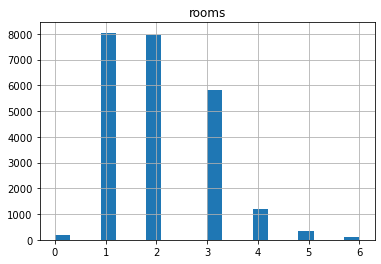

In [34]:
df.hist(column='rooms', bins=20, range=(0,top_range('rooms')))

Наибольшее количество объявлений для однокомнатных и двухкомнатных квартир, что коррелирует с данными по площади и стоимости.

**Высота потолков** <a class="anchor" id="высота_потолков"></a>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

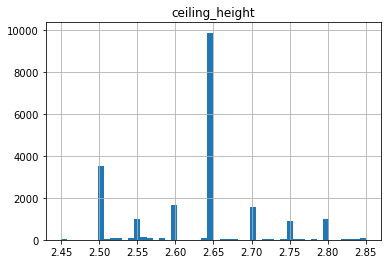

In [35]:
df.hist(column='ceiling_height', bins=50, range=(bottom_range('ceiling_height'),top_range('ceiling_height')))

Большое количество объектов с высотой потолков `2.65м` обусловлено тем, что это значение является медианным и им было заполнено порядка 10000 строк.

Также наблюдается кратность `5см` для высоты потолков.

**Этажность** <a class="anchor" id="этажность"></a>

In [36]:
floors_to_analyse = ['floor', 'floors_total']

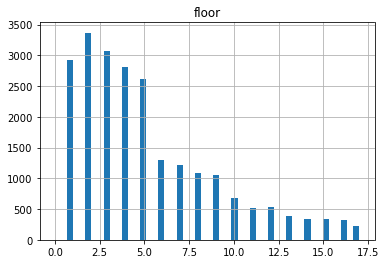

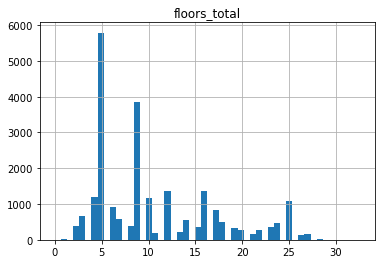

In [37]:
for col in floors_to_analyse:
    df.hist(column=col, bins=50, range=(0,top_range(col)))

array([[<AxesSubplot:title={'center':'floor_type_id'}>]], dtype=object)

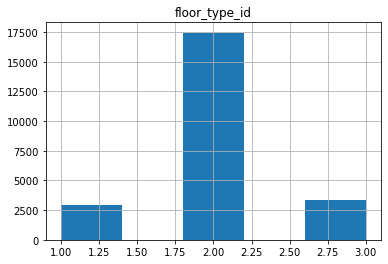

In [38]:
df.hist(column='floor_type_id', bins=5)

Как видно из гистограммы `floors_total` - больше всего объявлений размещено для квартир в 5-ти и 9-ти этажных домах.
Следовательно, чаще всего этаж, на котором расположена квартира находится в этом диапазоне.
Гистограмма типа этажа также соответствует данному распределению

Также стоит заметить, что 1 этаж не является самым популярным, несмотря на то, что статистически таких квартир должно быть больше всего.
Это может быть связано с тем, что в некоторых объявлениях может быть указан 2-й этаж, несмотря на то, что квартира фактически располагается на 1-м.

**Инфраструктура** <a class="anchor" id="инфраструктура"></a>

При построении гистограмм удаленности от инфраструктурных объектов исключаются заполненные на `0` пропуски.

In [39]:
surrounding_to_analyse = ['cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']

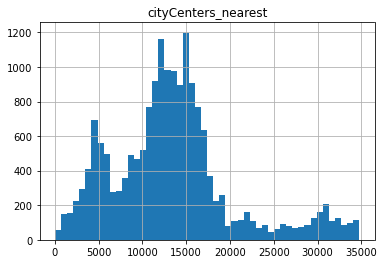

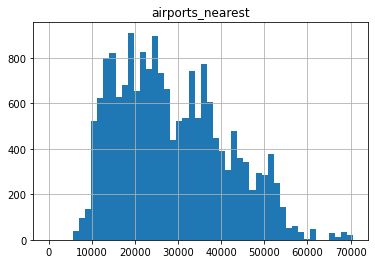

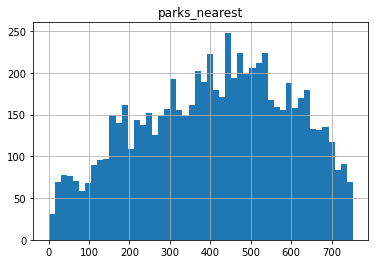

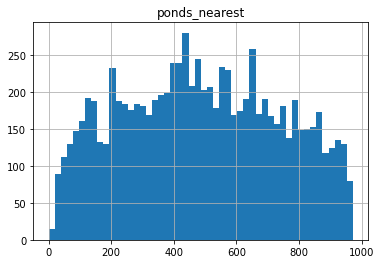

In [40]:
for col in surrounding_to_analyse:
    df.hist(column=col, bins=50, range=(0.1,top_range(col)))

2 максимума значений удаленности от центра могут быть связаны с тем, что приведены данные для разных населенных пунктов. Следует проверить эту гипотезу, составив гистограмму только для недвижимости в Санкт-Петербурге.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

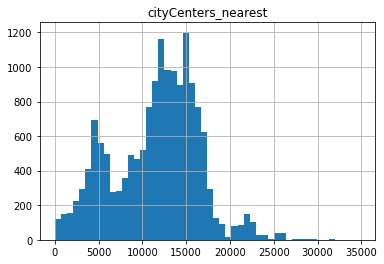

In [41]:
df.query('locality_name == "Санкт-Петербург"').hist(column='cityCenters_nearest', 
                                                    bins=50, 
                                                    range=(0,top_range('cityCenters_nearest')))

Гипотеза оказалась ошибочной, 2 максимума наблюдаются в том числе для недвижимости Санкт-Петербурга.

<div class="alert alert-info"> 
    
Подскажите пожалуйста, как можно проверить природу данной аномалии, не нахожу зависимостей

</div>

**Размещение объявления** <a class="anchor" id="размещение_объявления"></a>

In [42]:
exposition_to_analyse = ['exposition_weekday', 'exposition_month', 'exposition_year']

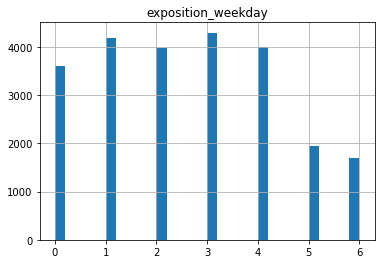

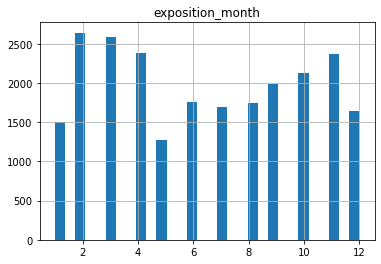

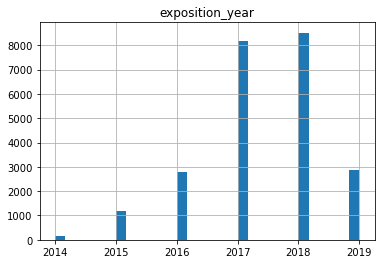

In [43]:
for col in exposition_to_analyse:
    df.hist(column=col, bins=30)

Как видно, в выходные размещается наименьшее количество объявлений. Вероятно, это связано с графиком работы агенств недвижимости.

Также за последние 5 лет наблюдается значительный рост числа объявлений. Данные за 2019 год неполные, поэтому низкое значение данного столбца не является показателем снижения активности.

### 4.2. Зависимость цены от различных параметров <a class="anchor" id="зависимость_цены"></a>

Необходимо оценить зависимость стоимости объектов недвижимости от следующих параметров:
  
* `общая площадь`
* `жилая площадь`
* `площадь кухни`
* `цена объекта`
* `количество комнат`
* `высота потолков`
* `этаж квартиры`
* `тип этажа квартиры` («первый», «последний», «другой»)
* `общее количество этажей в доме`
* `расстояние до центра города`
* `расстояние до ближайшего аэропорта`
* `расстояние до ближайшего парка`
* `день, месяц, год публикации объявления`

In [44]:
corr_list = ['last_price', 
             'total_area', 'living_area', 'kitchen_area', 
             'rooms', 'floor_type_id', 
             'exposition_weekday', 'exposition_month', 'exposition_year']

Для повышения точности анализа необходимо исключить из данных "выбросы", значения сильно отличающиеся от основной массы, а также заполненные нулем пропущенные значения удаленности инфраструктурных объектов.

In [45]:
for col in corr_list:
    print(col)
    print(bottom_range(col))
    print(top_range(col))
    print()    

last_price
-1700000.0
11900000.0

total_area
-4.8500000000000085
114.75000000000001

living_area
-15.650000000000006
76.75

kitchen_area
-0.5
19.5

rooms
-2.0
6.0

floor_type_id
2.0
2.0

exposition_weekday
-3.5
8.5

exposition_month
-7.5
20.5

exposition_year
2015.5
2019.5



Исключаются cледующие значения:
* общая площать больше 110м
* жилая площать больше 75м
* площать кухни больше 19м
* количество комнат больше 6
  
  
* удаленность от центра равная 0
* удаленность от аэропорта равная 0
* удаленность от парков равная 0
* удаленность от прудов равная 0

Для остальных параметров сохраняются все данные.

In [46]:
filter_list = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']

df_filtered = df

for filter in filter_list:
    df_filtered = df_filtered[df_filtered[filter] <= top_range(filter)]

In [47]:
filtered = len(df["last_price"]) - len(df_filtered["last_price"])
filtered_part = filtered / len(df_filtered["last_price"])

print (f'Среди значений цены, площади и количества комнат всего исключено {filtered} ({filtered_part :.1%}) значений')

Среди значений цены, площади и количества комнат всего исключено 2701 (12.9%) значений


**Зависимость цены от площади**

In [48]:
corr_area = ['total_area', 'living_area', 'kitchen_area']

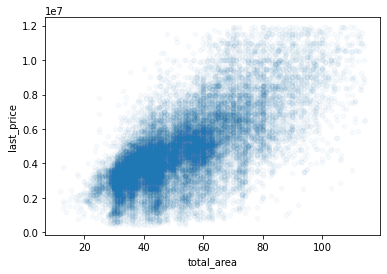

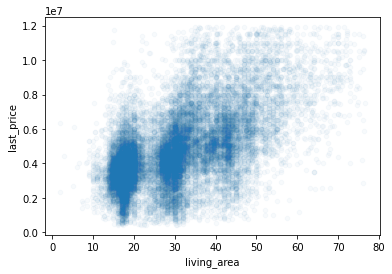

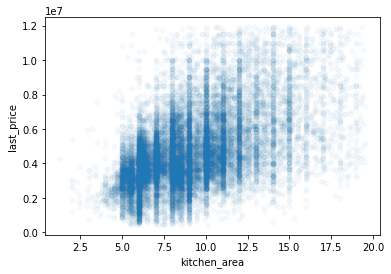

In [49]:
for parameter in corr_area:

    df_filtered.plot(kind='scatter',  
            x=parameter, 
            y='last_price',
            alpha = 0.03
           )

Наблюдается положительная корреляция между площатью недвижимости и ее ценой.  
Причем для общей площади корреляция более явная.

**Зависимость цены от количества комнат**

Поскольку количество комнат является дискретным значением - вместо диаграммы рассеяния стоит построить график медиан.

In [50]:
median_price_by_rooms = df_filtered.pivot_table(index='rooms', values='last_price', aggfunc='median')
median_price_by_rooms

,last_price
rooms,
0,2700000.0
1,3590000.0
2,4600000.0
3,5650000.0
4,6600000.0
5,7540000.0
6,6864000.0


<AxesSubplot:xlabel='rooms'>

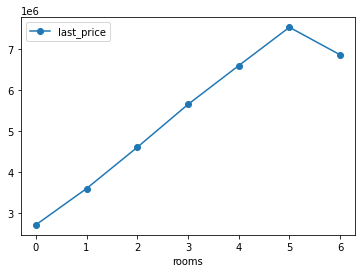

In [51]:
median_price_by_rooms.plot(y='last_price', 
                           kind='line',
                           style='o-')

Очевидна линейная зависимость цены от количества комнат.  
Уменьшение стоимости 6-комнатных квартир обусловлено малым количеством данных этой категории.

**Зависимость цены от типа этажа**

Тип этажа также является дискретным значением, оцениваются медианные значения для каждой категории.

In [52]:
median_price_by_foor_type = df.pivot_table(index='floor_type_id', values='last_price', aggfunc='median')
median_price_by_foor_type

,last_price
floor_type_id,
1,3900000.0
2,4850000.0
3,4300000.0


<AxesSubplot:xlabel='floor_type_id'>

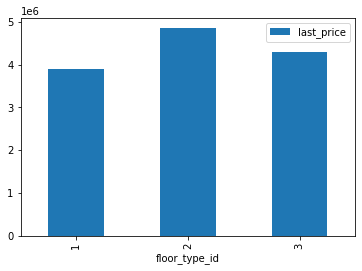

In [53]:
median_price_by_foor_type.plot(y='last_price', 
                               kind = 'bar' 
                               )

Квартиры на крайних этажах в среднем дешевле на 15-20%, причем для первого этажа это проявляется сильнее.

**Зависимость цены от инфраструктуры**

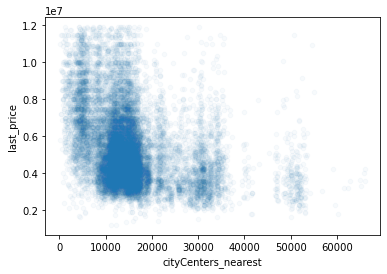

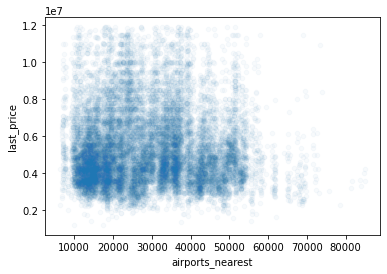

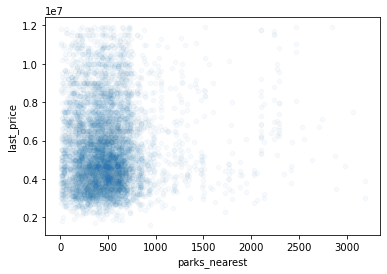

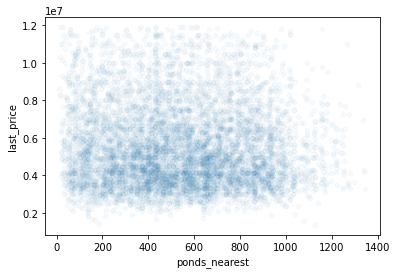

In [54]:
infrastructure_list = ['cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']

for parameter in infrastructure_list:
    df_filtered[df_filtered[parameter] > 0].plot(kind='scatter', 
                                                 x=parameter, 
                                                 y='last_price',  
                                                 alpha = 0.03)

Наличие поблизости парков, а также удаленность от аэропорта практически не влияют на стоимость жилья, в отличие от удаленности от центра.
Заметно падение стоимости жилья ближе к окраинам города.

**Зависимость цены от даты размещения объявления**

In [55]:
corr_exposition = ['exposition_weekday', 'exposition_month', 'exposition_year']

,last_price
exposition_weekday,
0,4650000.0
1,4730000.0
2,4700000.0
3,4650000.0
4,4585000.0
5,4555000.0
6,4550000.0


<AxesSubplot:xlabel='exposition_weekday'>

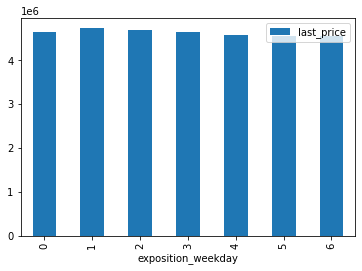

In [56]:
median_price_by_exposition_weekday = df.pivot_table(index='exposition_weekday', values='last_price', aggfunc='median')

display(median_price_by_exposition_weekday)

median_price_by_exposition_weekday.plot(y='last_price', 
                               kind = 'bar')

Зависимость цены от дня недели размещения объявления практически не проявляется

,last_price
exposition_month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4515000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


<AxesSubplot:xlabel='exposition_month'>

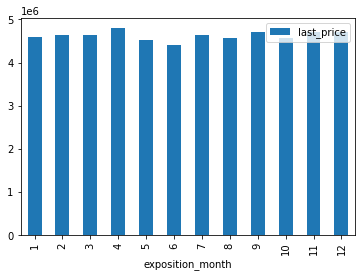

In [57]:
median_price_by_exposition_month = df.pivot_table(index='exposition_month', values='last_price', aggfunc='median')

display(median_price_by_exposition_month)

median_price_by_exposition_month.plot(y='last_price', 
                               kind = 'bar')

Наблюдается незначительное падение стоимости для объявлений, размещенных в мае и июне, однако размах диаграммы составляет менее 10%

### 4.3. Изучение скорости продажи недвижимости <a class="anchor" id="изучение_скорости"></a>

In [58]:
df_filtered = df_filtered[df_filtered['days_exposition'] <= top_range('days_exposition')]

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

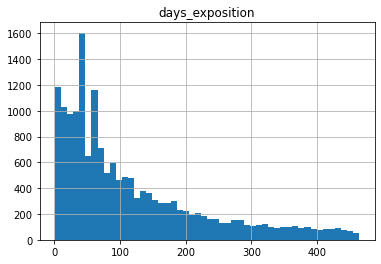

In [59]:
df_filtered.query('days_exposition > 0').hist(column='days_exposition', bins=50)

In [60]:
df_filtered.query('days_exposition > 0')['days_exposition'].describe()

count    16814.000000
mean       118.726954
std        110.552952
min          1.000000
25%         39.000000
50%         77.000000
75%        170.000000
max        464.000000
Name: days_exposition, dtype: float64

In [61]:
exposition_less_than_7 = len(df_filtered.query('0 < days_exposition <=7')['days_exposition']) / len(df_filtered.query('0 < days_exposition')['days_exposition'])
exposition_less_than_30 = len(df_filtered.query('0 < days_exposition <=30')['days_exposition']) / len(df_filtered.query('0 < days_exposition')['days_exposition'])
exposition_less_than_90 = len(df_filtered.query('0 < days_exposition <=91')['days_exposition']) / len(df_filtered.query('0 < days_exposition')['days_exposition'])
exposition_less_than_182 = len(df_filtered.query('0 < days_exposition <=182')['days_exposition']) / len(df_filtered.query('0 < days_exposition')['days_exposition'])
exposition_less_than_365 = len(df_filtered.query('0 < days_exposition <=365')['days_exposition']) / len(df_filtered.query('0 < days_exposition')['days_exposition'])

print(f'''Продается в течение недели: {exposition_less_than_7 :.1%} объектов;
Продается в течение месяца: {exposition_less_than_30 :.1%} объектов;
Продается в течение квартала: {exposition_less_than_90 :.1%} объектов;
Продается в течение полугода: {exposition_less_than_182 :.1%} объектов;
Продается в течение года: {exposition_less_than_365 :.1%} объектов.''')

Продается в течение недели: 4.8% объектов;
Продается в течение месяца: 20.8% объектов;
Продается в течение квартала: 55.2% объектов;
Продается в течение полугода: 77.3% объектов;
Продается в течение года: 94.8% объектов.


### 4.4. Средняя стоимость за м2 <a class="anchor" id="стоимость_за_м2"></a>

Производится оценка средней стоимости за м2 для недвижимости в 10-ти самых популярных населенных пунктах.

In [62]:
price_per_square_meter = df_filtered.pivot_table(index='locality_name', 
                                                 values='sqare_meter_price', 
                                                 aggfunc=['mean','count'])
price_per_square_meter.columns = ['sqare_meter_price', 'count'] 
price_per_square_meter = price_per_square_meter.sort_values(by='count', ascending=False).head(10)
price_per_square_meter = price_per_square_meter.sort_values(by='sqare_meter_price', ascending=False)
price_per_square_meter

,sqare_meter_price,count
locality_name,,
Санкт-Петербург,105465.910142,12267
Пушкин,99765.985811,300
Кудрово,95759.978716,408
Парголово,89931.251167,301
Мурино,86529.739226,539
Шушары,78657.780701,408
Колпино,75158.237973,312
Гатчина,68794.659222,274
Всеволожск,66992.642347,349


Разумеется, наибольшее количество объявлений размещено в Санкт-Петербурге.  
Также в рейтинг вошли несколько крупных пригородов, а также г.Выборг. 

<AxesSubplot:xlabel='locality_name'>

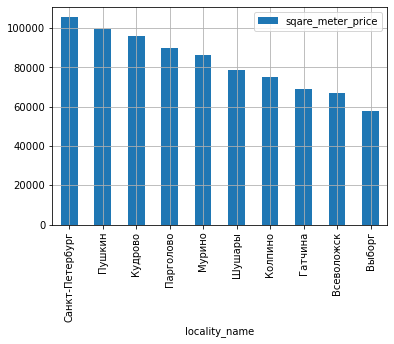

In [63]:
price_per_square_meter.plot(y='sqare_meter_price', 
                            kind = 'bar', 
                            grid=True)

Средняя стоимость квадратного метра жилья в Санкт-Петербурге превышает 100 тыс. рублей,  
в то время как в Выборге она составляет менее 60 тыс.

### 4.5. Отличие стоимости за м2 в центре и на окраине Санкт-Перербурга <a class="anchor" id="удаленность_от_центра_спб"></a>

In [64]:
square_meter_price_by_city_center = df_filtered.query('locality_name == "Санкт-Петербург"')[['sqare_meter_price', 'cityCenters_nearest_km']]

square_meter_price_by_city_center = square_meter_price_by_city_center.pivot_table(index='cityCenters_nearest_km', 
                                                                                  values='sqare_meter_price')

<AxesSubplot:xlabel='cityCenters_nearest_km'>

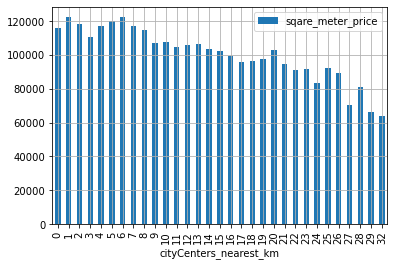

In [65]:
square_meter_price_by_city_center.plot(kind = 'bar', grid=True)

Заметно линейное изменение цены одного квадратного метра в зависимости от удаленности от центра города:
В центре 1 м2 стоит порядка 120 тыс. рублей
На окраине 1 м2 цена колеблется около 70 тыс. рублей

## 5. Выводы <a class="anchor" id="выводы"></a>

**1. Оценка распределения значений**  
  
* Наибольшее число объявлений представлено для одно- и двухкомнатных квартир, стоимостью от 3 до 5 млн. руб. и общей площадью от 30 до 50 м2.  
* Высота потолков большинства представленных квартир находится в диапазоне от 2,5 до 2,8м и кратна 5см.  
* Больше всего квартир расположено в 5 и 9-этажных домах.  
* Объявления о продаже обычно размещаются в будние дни, чаще всего - весной. Также за последние годы количество квартир, продаваемых через сервис Яндекс.Недвижимость выросло в 8 раз.  
    
    
**2. Зависимость цены от различных параметров**   
  
* Стоимость недвижимости линейно зависит от ее площади и количества комнат.  
* Стоимость недвижимости на первом и последнем этажах ниже, чем на промежуточных на 15-20%.  
* Наличие поблизости парков, а также удаленность от аэропорта практически не влияют на стоимость жилья. Удаленность от центра, наоборот, играет важную роль в формировании стоимости жилья.  
* День недели и месяц, когда было размещено объявление практически не коррелирует со стоимостью недвижимости.  
    
    
**3. Изучение скорости продажи недвижимости**
  
* Не стоит расчитывать на срочную продажу квартиры, обычно это занимает порядка 3 месяцев.  
    
  
**4. Средняя стоимость за м2**  
  
* Среди 10 населенных пунктов с наибольшим числом объявлений самая дорогая недвижимость в Санкт-Петербурге и ближайших пригородах. В ленинградской области больше всего объявлений размещено в г.Выборг, где средняя стоимость за м2 примерно вдвое ниже, чем в Санкт-Петербурге.  
    
  
**5. Отличие стоимости за м2 в центре и на окраине Санкт-Перербурга**  
  
* Как было отмечено выше, стоимость недвижимости, в том числе и за м2 уменьшается по мере удаленности от центра. На окраине Санкт-Петербурга цена квадратного метра приблизительно в 1.5 раз ниже, чем в центре города.